#**The Fashion-MNIST Data Set**
Before you go ahead and load in the data, it's good to take a look at what you'll exactly be working with! The *Fashion-MNIST dataset* is a dataset of Zalando's article images, with 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images. You can double check this later when you have loaded in your data! ;)

Fashion-MNIST is similar to the MNIST dataset that you might already know, which you use to classify handwritten digits. That means that the image dimensions, training and test splits are similar to the MNIST dataset.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Adam # - Works ,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from keras.layers import Dense
from keras.layers import Conv2D, MaxPooling2D
# from keras.models import Sequential
from keras.layers import Activation, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

##**Load Data**

In [4]:
from keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings('ignore')
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


####**Data Check**

In [5]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [6]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 4')

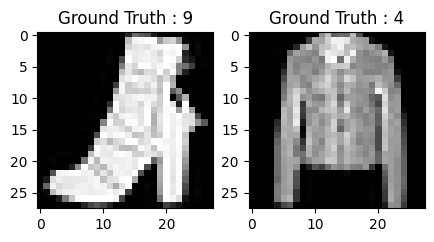

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[11,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[11]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[10,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[10]))

##**Data Preprocessing**

####**Reshape train and test sets into compatible shapes**

In [10]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

####**Normalize data**

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [14]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

##**Building CNN Architecture**

The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

1. The first layer will have 32-3 x 3 filters,
2. The second layer will have 64-3 x 3 filters and
3. The third layer will have 128-3 x 3 filters.

In addition, there are three max-pooling layers each of size 2 x 2.

In [16]:
#Define Input Parameters

batch_size = 64
epochs = 20
num_classes = 10

In [17]:
#Convolution layer

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())


#Fully connected Layer

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [18]:
#Compile the model

fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [19]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

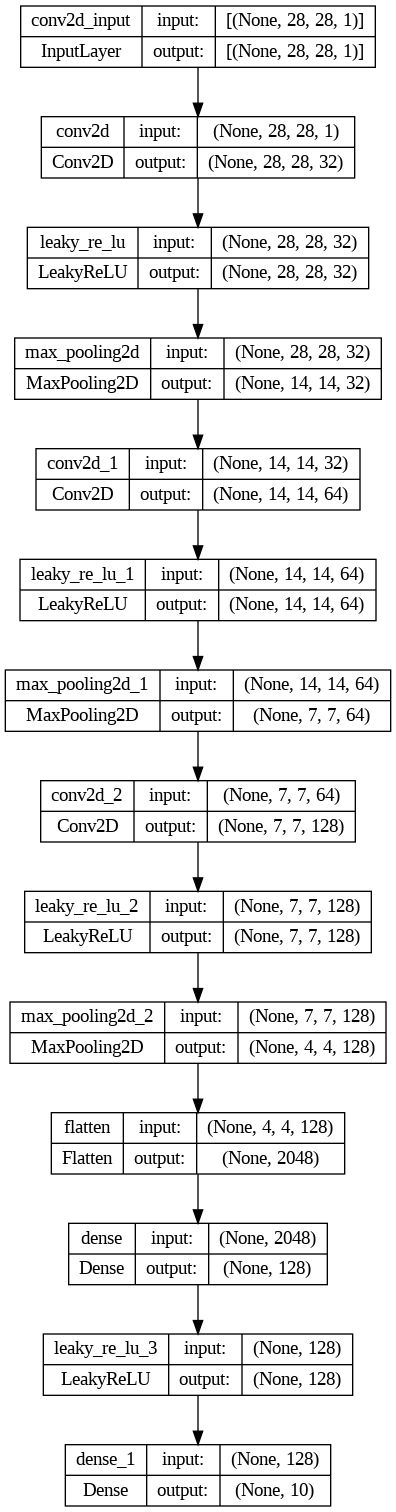

In [20]:
plot_model(fashion_model, to_file='mlp-mnist.png', show_shapes=True)

In [21]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 101s 131ms/step - loss: 0.4612 - accuracy: 0.8311 - val_loss: 0.3283 - val_accuracy: 0.8820
Epoch 2/20
750/750 [==============================] - 97s 129ms/step - loss: 0.2863 - accuracy: 0.8962 - val_loss: 0.2825 - val_accuracy: 0.8967
Epoch 3/20
750/750 [==============================] - 99s 131ms/step - loss: 0.2397 - accuracy: 0.9125 - val_loss: 0.2462 - val_accuracy: 0.9108
Epoch 4/20
750/750 [==============================] - 97s 130ms/step - loss: 0.2074 - accuracy: 0.9237 - val_loss: 0.2563 - val_accuracy: 0.9071
Epoch 5/20
750/750 [==============================] - 102s 136ms/step - loss: 0.1821 - accuracy: 0.9330 - val_loss: 0.2262 - val_accuracy: 0.9191
Epoch 6/20
750/750 [==============================] - 97s 129ms/step - loss: 0.1595 - accuracy: 0.9413 - val_loss: 0.2707 - val_accuracy: 0.9039
Epoch 7/20
750/750 [==============================] - 106s 141ms/step - loss: 0.1409 - accuracy: 0.9476 - val_loss: 0.2281 - val

####**Model Evaluation on the Test Set**

In [22]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5037508010864258
Test accuracy: 0.9111999869346619


In [24]:
fashion_train.history

{'loss': [0.4611820578575134,
  0.28632697463035583,
  0.2397247552871704,
  0.20743469893932343,
  0.18209242820739746,
  0.15950602293014526,
  0.14093363285064697,
  0.11822333931922913,
  0.10127347707748413,
  0.08882977068424225,
  0.07799386233091354,
  0.06086663156747818,
  0.05458474159240723,
  0.04985526576638222,
  0.042974747717380524,
  0.04022475332021713,
  0.03855205699801445,
  0.03266558796167374,
  0.03276472166180611,
  0.03055765852332115],
 'accuracy': [0.8310624957084656,
  0.8962291479110718,
  0.9125416874885559,
  0.9236875176429749,
  0.9329583048820496,
  0.9413333535194397,
  0.9475833177566528,
  0.9556249976158142,
  0.9626041650772095,
  0.9663749933242798,
  0.9708124995231628,
  0.9775416851043701,
  0.979479193687439,
  0.9812708497047424,
  0.9839583039283752,
  0.9854375123977661,
  0.9860416650772095,
  0.9885208606719971,
  0.9880416393280029,
  0.988937497138977],
 'val_loss': [0.32828235626220703,
  0.28246375918388367,
  0.24624618887901306,


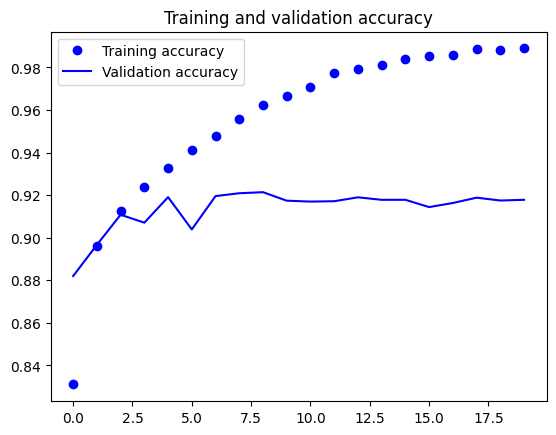

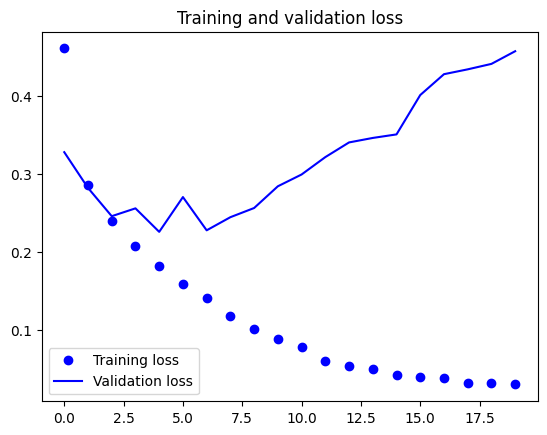

In [25]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

####**Adding Dropout into the Network**

In [26]:
batch_size = 64
epochs = 20
num_classes = 10

In [27]:
#Convolution Layer

fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())

#Fully Connected Layer

fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [28]:
#Compile the model

fashion_model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])



fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 107s 140ms/step - loss: 0.5938 - accuracy: 0.7817 - val_loss: 0.3705 - val_accuracy: 0.8622
Epoch 2/20
750/750 [==============================] - 104s 139ms/step - loss: 0.3782 - accuracy: 0.8608 - val_loss: 0.3202 - val_accuracy: 0.8791
Epoch 3/20
750/750 [==============================] - 108s 144ms/step - loss: 0.3361 - accuracy: 0.8774 - val_loss: 0.2922 - val_accuracy: 0.8938
Epoch 4/20
750/750 [==============================] - 104s 139ms/step - loss: 0.3069 - accuracy: 0.8873 - val_loss: 0.2778 - val_accuracy: 0.8951
Epoch 5/20
750/750 [==============================] - 104s 139ms/step - loss: 0.2874 - accuracy: 0.8936 - val_loss: 0.2565 - val_accuracy: 0.9049
Epoch 6/20
750/750 [==============================] - 104s 139ms/step - loss: 0.2743 - accuracy: 0.8978 - val_loss: 0.2465 - val_accuracy: 0.9062
Epoch 7/20
750/750 [==============================] - 106s 141ms/step - loss: 0.2631 - accuracy: 0.9018 - val_loss: 0.2526 -

In [29]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [30]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.223518505692482
Test accuracy: 0.9207000136375427


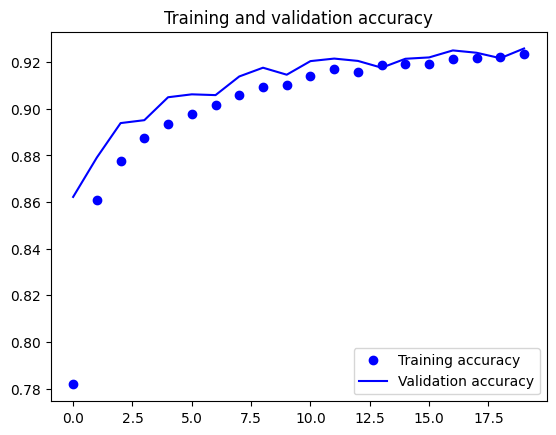

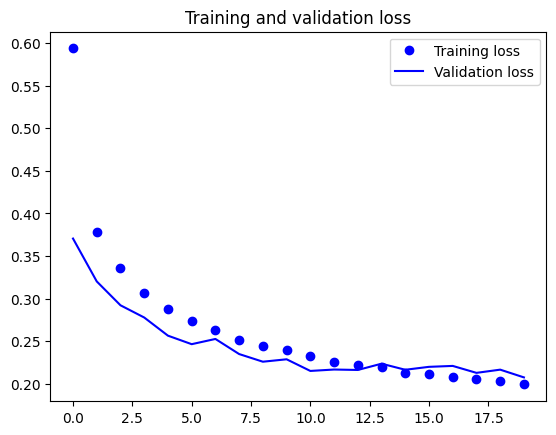

In [31]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()